# Making Country Dataset Accessible 

## prerequisite python libraries
### country_converter
* Using [country_converter](https://pypi.org/project/country-converter/)
* [Examples in Jupyter Notebook](http://nbviewer.ipython.org/github/konstantinstadler/country_converter/blob/master/doc/country_converter_examples.ipynb)

In [2]:
import country_converter as coco

In [3]:
import pandas as pd
import numpy as np

## Data: World Happiness Report 2022 -- Data for Figure 2.1 

* HTML source: [WHR 2022](https://worldhappiness.report/ed/2022/#appendices-and-data)
* Data source: [Data for Figure 2.1](https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls)

### Data collection

In [3]:
URL = "https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls"

df = pd.read_excel(URL)

In [4]:
df_original = df.copy()

In [5]:
# df = df_original

### Data refining / cleaning

In [6]:
df = df.replace ("xx", np.nan).set_index("RANK").dropna(how = "all")

In [7]:
## illustrative examples

names_input = df ["Country"]

name_short_dict = coco.convert(names=names_input, to='name_short')
name_short_dict 
print (name_short_dict)

cc = coco.CountryConverter()
name_short = cc.pandas_convert(series=df ["Country"], to='name_short')
name_short

['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands', 'Luxembourg', 'Sweden', 'Norway', 'Israel', 'New Zealand', 'Austria', 'Australia', 'Ireland', 'Germany', 'Canada', 'United States', 'United Kingdom', 'Czech Republic', 'Belgium', 'France', 'Bahrain', 'Slovenia', 'Costa Rica', 'United Arab Emirates', 'Saudi Arabia', 'Taiwan', 'Singapore', 'Romania', 'Spain', 'Uruguay', 'Italy', 'Kosovo', 'Malta', 'Lithuania', 'Slovakia', 'Estonia', 'Panama', 'Brazil', 'Guatemala', 'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile', 'Nicaragua', 'Mexico', 'Croatia', 'Poland', 'El Salvador', 'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan', 'Japan', 'Honduras', 'Portugal', 'Argentina', 'Greece', 'South Korea', 'Philippines', 'Thailand', 'Moldova', 'Jamaica', 'Kyrgyz Republic', 'Belarus', 'Colombia', 'Bosnia and Herzegovina', 'Mongolia', 'Dominican Republic', 'Malaysia', 'Bolivia', 'China', 'Paraguay', 'Peru', 'Montenegro', 'Ecuador', 'Vietnam', 'Turkmenistan', 'Cyprus', 'Russia', 'Hong Kong', 

RANK
1          Finland
2          Denmark
3          Iceland
4      Switzerland
5      Netherlands
          ...     
142       Botswana
143         Rwanda
144       Zimbabwe
145        Lebanon
146    Afghanistan
Name: Country, Length: 146, dtype: object

In [8]:
## codes in production
cc = coco.CountryConverter()
country_output_list = ['name_short', 'ISO2', 'ISO3']

for k in country_output_list:
    df[k] = cc.pandas_convert(series=df ["Country"], to=k, not_found=np.nan)

## index
df = df.reset_index()
_columns_ = list ( df.columns )
_columns_original_ = [x for x in _columns_ if x not in country_output_list]
df = df[country_output_list+_columns_original_]

## check np.nan
check_nan = df[country_output_list].isna().sum()

_array_ = check_nan.values
if (_array_ == 0).all():
    print ("Great! There is no np.nan values in the coutnry outputs. All data entries have produced values.")
else:
    print ("Issues?! ")
    display ( check_nan )


Great! There is no np.nan values in the coutnry outputs. All data entries have produced values.


In [9]:
df

name_short ISO2 ISO3  RANK      Country  Happiness score  Whisker-high  \
0        Finland   FI  FIN     1      Finland           7.8210      7.886425   
1        Denmark   DK  DNK     2      Denmark           7.6362      7.709897   
2        Iceland   IS  ISL     3      Iceland           7.5575      7.651076   
3    Switzerland   CH  CHE     4  Switzerland           7.5116      7.586394   
4    Netherlands   NL  NLD     5  Netherlands           7.4149      7.471265   
..           ...  ...  ...   ...          ...              ...           ...   
141     Botswana   BW  BWA   142    Botswana*           3.4711      3.666935   
142       Rwanda   RW  RWA   143      Rwanda*           3.2682      3.462218   
143     Zimbabwe   ZW  ZWE   144     Zimbabwe           2.9951      3.109822   
144      Lebanon   LB  LBN   145      Lebanon           2.9553      3.048951   
145  Afghanistan   AF  AFG   146  Afghanistan           2.4038      2.468731   

     Whisker-low  Dystopia (1.83) + residual  Explained by: GDP per capita  \
0       7.755575                    2.518052                      1.891628   
1       7.562503                    2.225632                      1.952595   
2       7.463924                    2.320185                      1.935726   
3       7.436806                    2.152746                      2.025970   
4       7.358534                    2.136937                      1.944578   
..           ...                         ...                           ...   
141     3.275265                    0.187416                      1.502590   
142     3.074182                    0.536299                      0.785252   
143     2.880378                    0.547529                      0.946604   
144     2.861649                    0.215537                      1.392068   
145     2.338869                    1.263403                      0.757994   

     Explained by: Social support  Explained by: Healthy life expectancy  \
0                        1.258108                               0.775206   
1                        1.242681                               0.776644   
2                        1.319914                               0.802622   
3                        1.226074                               0.822048   
4                        1.205848                               0.786738   
..                            ...                                    ...   
141                      0.815473                               0.279801   
142                      0.132698                               0.461527   
143                      0.690460                               0.270086   
144                      0.497999                               0.630964   
145                      0.000000                               0.288626   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                      0.735590                  0.108733   
1                                      0.718918                  0.187626   
2                                      0.718194                  0.269616   
3                                      0.676947                  0.146822   
4                                      0.650682                  0.271076   
..                                          ...                       ...   
141                                    0.571353                  0.012459   
142                                    0.621479                  0.186662   
143                                    0.329203                  0.106265   
144                                    0.102799                  0.082191   
145                                    0.000000                  0.088873   

     Explained by: Perceptions of corruption  
0                                   0.533658  
1                                   0.532079  
2                                   0.191204  
3                                   0.461004  
4                                  

In [10]:
display (  df [ df[country_output_list].duplicated(keep=False) ]  )


name_short ISO2 ISO3  RANK        Country  Happiness score  Whisker-high  \
40     Cyprus   CY  CYP    41         Cyprus           6.2209      6.320243   
78     Cyprus   CY  CYP    79  North Cyprus*           5.4666      5.608694   

    Whisker-low  Dystopia (1.83) + residual  Explained by: GDP per capita  \
40     6.121557                    2.044133                      1.815065   
78     5.324506                    1.078338                      1.815065   

    Explained by: Social support  Explained by: Healthy life expectancy  \
40                      0.909315                               0.819165   
78                      0.888054                               0.819165   

    Explained by: Freedom to make life choices  Explained by: Generosity  \
40                                    0.448146                  0.123327   
78                                    0.522693                  0.130266   

    Explained by: Perceptions of corruption  
40                                 0.061780  
78                                 0.213033

In [11]:
## cleaning data with Note

_last_ = df [ df[country_output_list].duplicated(keep="first") ] .copy()
_last_ ["name_short"] = _last_ ["Country"]
for k in country_output_list:
    _last_ [k] = _last_ [k].str.replace('*',"", regex=False )+" {note}"
display (_last_)

## updating df
df_old = df.copy()
df.update(_last_)


display (  df [ df_old[country_output_list].duplicated(keep=False) ]  )


name_short       ISO2        ISO3  RANK        Country  \
78  North Cyprus {note}  CY {note}  CYP {note}    79  North Cyprus*   

    Happiness score  Whisker-high  Whisker-low  Dystopia (1.83) + residual  \
78           5.4666      5.608694     5.324506                    1.078338   

    Explained by: GDP per capita  Explained by: Social support  \
78                      1.815065                      0.888054   

    Explained by: Healthy life expectancy  \
78                               0.819165   

    Explained by: Freedom to make life choices  Explained by: Generosity  \
78                                    0.522693                  0.130266   

    Explained by: Perceptions of corruption  
78                                 0.213033

name_short       ISO2        ISO3  RANK        Country  \
40               Cyprus         CY         CYP  41.0         Cyprus   
78  North Cyprus {note}  CY {note}  CYP {note}  79.0  North Cyprus*   

    Happiness score  Whisker-high  Whisker-low  Dystopia (1.83) + residual  \
40           6.2209      6.320243     6.121557                    2.044133   
78           5.4666      5.608694     5.324506                    1.078338   

    Explained by: GDP per capita  Explained by: Social support  \
40                      1.815065                      0.909315   
78                      1.815065                      0.888054   

    Explained by: Healthy life expectancy  \
40                               0.819165   
78                               0.819165   

    Explained by: Freedom to make life choices  Explained by: Generosity  \
40                                    0.448146                  0.123327   
78                                    0.522693                  0.130266   

    Explained by: Perceptions of corruption  
40                                 0.061780  
78                                 0.213033

### Data classification
* cc.valid_class
* cc.valid_country_classifications
* [classification schemes available](https://github.com/konstantinstadler/country_converter#classification-schemes)

In [12]:
## examples

print (cc.valid_class)
print (cc.valid_country_classifications)
print (cc.continent)
print (cc.UNregion)

# 'APEC', 'BASIC', 'BRIC', 'CIS' 'G20', 'G7'

['APEC', 'BASIC', 'BRIC', 'CIS', 'Cecilia2050', 'DACcode', 'EEA', 'EU', 'EU12', 'EU15', 'EU25', 'EU27', 'EU27_2007', 'EU28', 'EURO', 'EXIO1', 'EXIO1_3L', 'EXIO2', 'EXIO2_3L', 'EXIO3', 'EXIO3_3L', 'Eora', 'FAOcode', 'G20', 'G7', 'GBDcode', 'GWcode', 'IEA', 'IMAGE', 'ISO2', 'ISO3', 'ISOnumeric', 'MESSAGE', 'OECD', 'REMIND', 'Schengen', 'UN', 'UNcode', 'UNmember', 'UNregion', 'WIOD', 'ccTLD', 'continent', 'name_official', 'name_short', 'obsolete', 'regex']
['DACcode', 'Eora', 'FAOcode', 'GBDcode', 'GWcode', 'ISO2', 'ISO3', 'ISOnumeric', 'UNcode', 'ccTLD', 'name_official', 'name_short', 'regex']
                    name_short continent
0                  Afghanistan      Asia
1                Aland Islands    Europe
2                      Albania    Europe
3                      Algeria    Africa
4               American Samoa   Oceania
..                         ...       ...
245  Wallis and Futuna Islands   Oceania
246             Western Sahara    Africa
247                      Yemen  

In [13]:
## codes in production

country_region_list = ['continent', 'UNregion']
country_group_list = ['APEC', 'G20', 'G7', 'BRIC', 'CIS' ]
country_classifications_list = country_region_list + country_group_list

for k in country_classifications_list:
    df[k] = cc.pandas_convert(series=df ["name_short"], to=k, not_found=np.nan)

## index for future multi-index columns
_columns_ = list ( df.columns )
_country_list_ = country_output_list + country_classifications_list
_columns_original_ = [x for x in _columns_ if x not in _country_list_]
_columns_original_
df = df [_country_list_+_columns_original_]
df
    
## check np.nan
check_nan = df[country_region_list].isna().sum()

_array_ = check_nan.values
if (_array_ == 0).all():
    print ("Great! There is no np.nan values in the *country_region_list* outputs. All data entries have produced values.")
else:
    print ("Issues?! ")
    display ( check_nan )


Great! There is no np.nan values in the *country_region_list* outputs. All data entries have produced values.


In [14]:
df.columns

Index(['name_short', 'ISO2', 'ISO3', 'continent', 'UNregion', 'APEC', 'G20',
       'G7', 'BRIC', 'CIS', 'RANK', 'Country', 'Happiness score',
       'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

### Data output

In [15]:
filename = "WHR-2022-Data_Figure_2.1.tsv"
df.to_csv (filename, sep="\t")

In [16]:
# Formatter(format="0.0%")
from importlib import reload
import pandas as pd
import jinja2
reload(pd)
reload(jinja2)

df.style.format({"RANK": '{:.0f}'}, precision=3, na_rep='_', )
df.head()

name_short ISO2 ISO3 continent         UNregion APEC  G20   G7 BRIC  CIS  \
0      Finland   FI  FIN    Europe  Northern Europe  NaN  G20  NaN  NaN  NaN   
1      Denmark   DK  DNK    Europe  Northern Europe  NaN  G20  NaN  NaN  NaN   
2      Iceland   IS  ISL    Europe  Northern Europe  NaN  NaN  NaN  NaN  NaN   
3  Switzerland   CH  CHE    Europe   Western Europe  NaN  NaN  NaN  NaN  NaN   
4  Netherlands   NL  NLD    Europe   Western Europe  NaN  G20  NaN  NaN  NaN   

   ...  Happiness score Whisker-high  Whisker-low  Dystopia (1.83) + residual  \
0  ...           7.8210     7.886425     7.755575                    2.518052   
1  ...           7.6362     7.709897     7.562503                    2.225632   
2  ...           7.5575     7.651076     7.463924                    2.320185   
3  ...           7.5116     7.586394     7.436806                    2.152746   
4  ...           7.4149     7.471265     7.358534                    2.136937   

   Explained by: GDP per capita  Explained by: Social support  \
0                      1.891628                      1.258108   
1                      1.952595                      1.242681   
2                      1.935726                      1.319914   
3                      2.025970                      1.226074   
4                      1.944578                      1.205848   

   Explained by: Healthy life expectancy  \
0                               0.775206   
1                               0.776644   
2                               0.802622   
3                               0.822048   
4                               0.786738   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.735590                  0.108733   
1                                    0.718918                  0.187626   
2                                    0.718194                  0.269616   
3                                    0.676947                  0.146822   
4                                    0.650682                  0.271076   

   Explained by: Perceptions of corruption  
0                                 0.533658  
1                                 0.532079  
2                                 0.191204  
3                                 0.461004  
4                                 0.419083  

[5 rows x 22 columns]

### Data visualization

In [17]:
from bokeh.layouts import gridplot, column, row
from bokeh.models import ColumnDataSource, HoverTool, DataTable, TableColumn, StringFormatter, NumberFormatter 
from bokeh.plotting import figure, show, save
from bokeh.sampledata.penguins import data
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20  # https://docs.bokeh.org/en/latest/docs/reference/palettes.html




In [18]:
TOOLS = "box_select,lasso_select,help"

UNregion = sorted(df.UNregion.unique()) #data
index_cmap = factor_cmap('UNregion',
                         palette=Category20[20], 
                         factors=UNregion, 
                         )  # start=1, end=2

source = ColumnDataSource(df) #data

index = "name_short"
col_y = "Happiness score"

col_x_list = [\
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption']

hover = HoverTool(tooltips=[\
    ("rank", "@RANK"),
    ("country", "@name_short"),
    ("Happiness score", "@{Happiness score}"),
    ('group', '@UNregion'),
    ('ISO3', '@ISO3'),
    ("(x,y)", "($x, $y)"),
])


fig_list = []
for col in col_x_list:
    col_x = col
    _title_ = "factor: " + col.split(": ")[1]
    _fig_ = figure(width=360, height=360, title=_title_, tools=TOOLS, background_fill_color="#fafafa") #
    _fig_.scatter(col_x, col_y, source=source, size = 5, color=index_cmap) 
    _fig_.xaxis.axis_label = col_x
    _fig_.yaxis.axis_label = col_y
    _fig_.add_tools(hover)
    fig_list.append(_fig_)

gp = gridplot( fig_list, ncols=2, width=360 ) # , sizing_mode = "stretch_both"

data_columns = [
        TableColumn(field="RANK", title="Rank", width = 30),
        TableColumn(field="name_short", title="Country", formatter =  StringFormatter (font_style = "bold"), width = 200),
        TableColumn(field="Happiness score", title="Happiness score", formatter =  NumberFormatter (format = "0.00"), width = 70),
        TableColumn(field="UNregion", title="Groups: UN regions", width = 200),
    ]
data_table = DataTable(source=source, columns=data_columns, width=280, height=1024, \
                       autosize_mode="fit_columns", index_position = None)  # , width_policy = "fixed"

# plot_Bokeh = column([data_table, gp], width=1025, height=360, sizing_mode = "scale_height")

In [19]:
plot_Bokeh = gridplot(
        children=[[data_table, gp]],
        toolbar_location='left',
         )

In [20]:
"(${col_x}, ${col_y})".format(col_x=col_x, col_y=col_y) 
# len(UNregion)
col_x_list

['Explained by: GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption']

In [42]:
from bokeh.models import Div
title = Div(text='<h3>World Happiness Report 2022 -- Data for Figure 2.1</h3> <ul><li>Jupyter Notebook ipynb source: <a href="https://github.com/hanteng/MakingCountryDatasetAvailable/blob/main/MakingCountryDatasetAvailable_with_map.ipynb" rel="noopener" target="_blank">Making Country Dataset Accessible</a></li><li>HTML source: <a href="https://worldhappiness.report/ed/2022/#appendices-and-data" rel="noopener" target="_blank">WHR 2022</a></li><li>Data source: <a href="https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls" rel="noopener" target="_blank">Data for Figure 2.1</a></li></ul>')

from bokeh.io import output_notebook, output_file
output_notebook()
output_file ( filename = "WHR 2022-Figure 2.1.htm", title = 'World Happiness Report 2022 -- Data for Figure 2.1',\
              mode = 'inline')
#save (column(title, plot_Bokeh))

show (column(title, plot_Bokeh))

Loading BokehJS ...

### Data visualization with geopandas

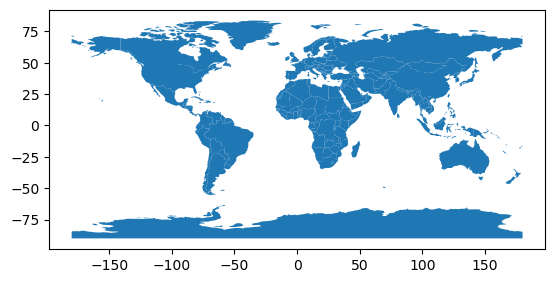

In [342]:
# using only matplotlib
import geopandas
import matplotlib.pyplot as plt

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig = world.plot()
plt.show(fig)

#### Data merging

In [44]:
world.iso_a3

0      FJI
1      TZA
2      ESH
3      CAN
4      USA
      ... 
172    SRB
173    MNE
174    -99
175    TTO
176    SSD
Name: iso_a3, Length: 177, dtype: object

In [45]:
dfw = pd.merge(world, df, how='inner',  left_on='iso_a3', right_on='ISO3').fillna(0)
dfw.head()

pop_est    continent_x                      name iso_a3  gdp_md_est  \
0   58005463.0         Africa                  Tanzania    TZA       63177   
1   37589262.0  North America                    Canada    CAN     1736425   
2  328239523.0  North America  United States of America    USA    21433226   
3   18513930.0           Asia                Kazakhstan    KAZ      181665   
4   33580650.0           Asia                Uzbekistan    UZB       57921   

                                            geometry     name_short ISO2 ISO3  \
0  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...       Tanzania   TZ  TZA   
1  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...         Canada   CA  CAN   
2  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  United States   US  USA   
3  POLYGON ((87.35997 49.21498, 86.59878 48.54918...     Kazakhstan   KZ  KAZ   
4  POLYGON ((55.96819 41.30864, 55.92892 44.99586...     Uzbekistan   UZ  UZB   

  continent_y  ... Happiness score Whisker-high Whisker-low  \
0      Africa  ...          3.7024     3.847233    3.557567   
1     America  ...          7.0251     7.107069    6.943132   
2     America  ...          6.9768     7.065357    6.888243   
3        Asia  ...          6.2341     6.329740    6.138460   
4        Asia  ...          6.0627     6.177521    5.947879   

  Dystopia (1.83) + residual Explained by: GDP per capita  \
0                   0.734893                     0.848456   
1                   1.923639                     1.886453   
2                   2.213618                     1.982345   
3                   1.860237                     1.667982   
4                   1.913072                     1.219146   

  Explained by: Social support  Explained by: Healthy life expectancy  \
0                     0.597017                               0.425457   
1                     1.187763                               0.783143   
2                     1.181637                               0.628134   
3                     1.220167                               0.611264   
4                     1.091556                               0.599748   

  Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                   0.577786                  0.248357   
1                                   0.658886                  0.216965   
2                                   0.574273                  0.220042   
3                                   0.583537                  0.133794   
4                                   0.715671                  0.283129   

   Explained by: Perceptions of corruption  
0                                 0.270454  
1                                 0.368206  
2                                 0.176712  
3                                 0.157141  
4                                 0.240422  

[5 rows x 28 columns]

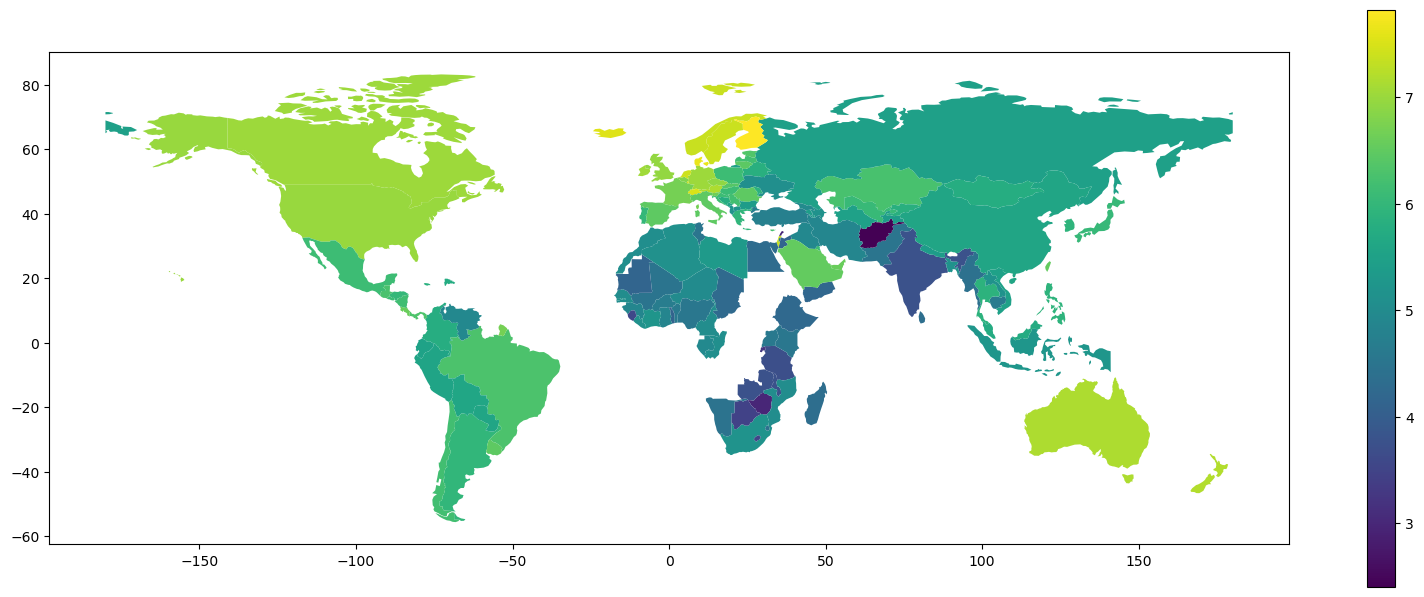

In [46]:
# visualizating using only pandas + geopandas

indicator_chosen = "Happiness score"
fig_world = dfw.plot( column= indicator_chosen, \
                                    legend=True, legend_kwds={'shrink': 0.5}, figsize=(20, 15),\
                                    missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

Text(0.5, 1.0, 'Visualization: Happiness score')

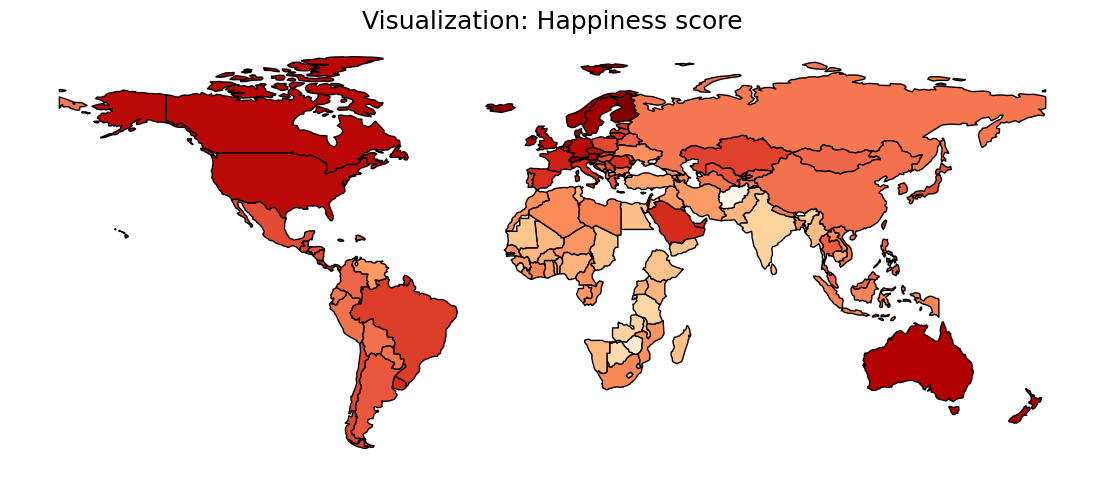

In [47]:
# visualizating using only matplotlib

import matplotlib as mpl

fig, ax = plt.subplots(1, figsize=(14, 8))
dfw.plot (column=indicator_chosen, cmap='OrRd', linewidth=1, ax=ax, edgecolor='black')
ax.axis ('off')
ax.set_title ("Visualization: {ind}".format(ind=indicator_chosen), fontsize=18)

#### Bokeh Using

In [48]:
####  Using Bokeh

import json 

from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer

def get_geodatasource(gdf):    
    """Get getjsondatasource from geopandas object"""
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

def bokeh_plot_map(gdf, column=None, title=''):
    """Plot bokeh map from GeoJSONDataSource """

    geosource = get_geodatasource(gdf)
    palette = brewer['OrRd'][8]
    palette = palette[::-1]
    vals = gdf[column]
    
    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = vals.min(), high = vals.max())
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                         location=(0,0), orientation='horizontal')

    TOOLS = 'wheel_zoom,pan,reset'
    p = figure(title = title, plot_height=400 , plot_width=850, toolbar_location='right', tools=TOOLS)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    #Add patch renderer to figure
    p.patches('xs','ys', source=geosource, fill_alpha=1, line_width=0.5, line_color='black',  
              fill_color={'field' :column , 'transform': color_mapper})
    #Specify figure layout.
    p.add_layout(color_bar, 'below')
    return p

In [49]:
output_notebook()
fig = bokeh_plot_map(dfw, column=indicator_chosen)
show(fig)

Loading BokehJS ...

In [50]:
####  Using Bokeh with HoverTool
from bokeh.models import ColumnDataSource, HoverTool, DataTable, TableColumn, StringFormatter, NumberFormatter 

output_notebook()

fig = bokeh_plot_map(dfw, column=indicator_chosen)
fig.add_tools(hover)
show(fig)

Loading BokehJS ...

#### Putting altogether

In [63]:

title = Div(text='<h3>World Happiness Report 2022 -- Data for Figure 2.1</h3> <ul><li>Jupyter Notebook ipynb source: <a href="https://github.com/hanteng/MakingCountryDatasetAvailable/blob/main/MakingCountryDatasetAvailable_with_map.ipynb" rel="noopener" target="_blank">Making Country Dataset Accessible</a></li><li>HTML source: <a href="https://worldhappiness.report/ed/2022/#appendices-and-data" rel="noopener" target="_blank">WHR 2022</a></li><li>Data source: <a href="https://happiness-report.s3.amazonaws.com/2022/Appendix_2_Data_for_Figure_2.1.xls" rel="noopener" target="_blank">Data for Figure 2.1</a></li></ul>')

output_notebook()
output_file ( filename = "WHR 2022-Figure 2.1_with_worldmap.htm", title = 'World Happiness Report 2022 -- Data for Figure 2.1',\
              mode = 'inline')
#save (column(title, plot_Bokeh))

show (column(title, plot_Bokeh, fig))

Loading BokehJS ...

In [52]:
# future work ColumnDataSource linking

### Data analysis
#### by regions

In [53]:
dfUNr = df.groupby("UNregion")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfUNr.sort_values (( 'Happiness score', 'mean'), ascending = False)

RANK Happiness score Whisker-high  \
                                 mean            mean         mean   
UNregion                                                             
Australia and New Zealand   11.000000        7.180950     7.261461   
Western Europe              11.285714        7.145614     7.223593   
Northern Europe             16.300000        7.071420     7.148575   
Northern America            15.500000        7.000950     7.086213   
Central America             42.000000        6.226800     6.370979   
Southern Europe             51.692308        6.035031     6.140365   
Eastern Europe              57.000000        5.958810     6.056950   
Central Asia                63.600000        5.795340     5.893711   
Caribbean                   66.000000        5.793400     5.948399   
South America               63.700000        5.788230     5.898081   
Eastern Asia                69.428571        5.664500     5.749115   
South-eastern Asia          73.875000        5.561437     5.669176   
Western Asia                80.000000        5.370013     5.490516   
Northern Africa            106.200000        4.863220     4.989119   
Middle Africa              109.250000        4.832975     5.004305   
Western Africa             113.000000        4.678243     4.846782   
Southern Asia              116.857143        4.354114     4.454019   
Eastern Africa             122.083333        4.244175     4.407752   
Southern Africa            124.600000        4.206460     4.385922   

                          Whisker-low Dystopia (1.83) + residual  \
                                 mean                       mean   
UNregion                                                           
Australia and New Zealand    7.100439                   1.982457   
Western Europe               7.067635                   2.114094   
Northern Europe              6.994265                   2.022052   
Northern America             6.915687                   2.068629   
Central America              6.082621                   2.422781   
Southern Europe              5.929697                   1.896571   
Eastern Europe               5.860670                   1.832004   
Central Asia                 5.696969                   1.782879   
Caribbean                    5.638400                   1.957449   
South America                5.678379                   2.044536   
Eastern Asia                 5.579885                   1.454040   
South-eastern Asia           5.453699                   1.555104   
Western Asia                 5.249509                   1.530186   
Northern Africa              4.737321                   1.617714   
Middle Africa                4.661645                   2.359353   
Western Africa               4.509703                   2.241001   
Southern Asia                4.254210                   1.458755   
Eastern Africa               4.080598                   1.546254   
Southern Africa              4.026999                   1.268896   

                          Explained by: GDP per capita  \
                                                  mean   
UNregion                                                 
Australia and New Zealand                     1.875965   
Western Europe                                1.972136   
Northern Europe                               1.902262   
Northern America                              1.934399   
Central America                               1.372175   
Southern Europe                               1.642704   
Eastern Europe                                1.647598   
Central Asia                                  1.281288   
Caribbean                                     1.416674   
South America                                 1.318475   
Eastern Asia                                  1.639962   
South-eastern Asia                            1.441600   
Western Asia                                  1.561967   
Northern Africa                               1.356909   
Middle Af

In [54]:
dfUNr = df.groupby("continent")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfUNr.sort_values (( 'Happiness score', 'mean'), ascending = False)

RANK Happiness score Whisker-high Whisker-low  \
                 mean            mean         mean        mean   
continent                                                        
Oceania     11.000000        7.180950     7.261461    7.100439   
Europe      37.100000        6.469425     6.561129    6.377721   
America     52.095238        6.050409     6.173661    5.927158   
Asia        81.232558        5.337644     5.444004    5.231285   
Africa     115.950000        4.527645     4.691010    4.364280   

          Dystopia (1.83) + residual Explained by: GDP per capita  \
                                mean                         mean   
continent                                                           
Oceania                     1.982457                     1.875965   
Europe                      1.949866                     1.766468   
America                     2.164618                     1.404387   
Asia                        1.540181                     1.447771   
Africa                      1.844988                     0.994145   

          Explained by: Social support Explained by: Healthy life expectancy  \
                                  mean                                  mean   
continent                                                                      
Oceania                       1.219009                              0.762210   
Europe                        1.133966                              0.721092   
America                       1.001562                              0.649002   
Asia                          0.890334                              0.618262   
Africa                        0.628449                              0.374875   

          Explained by: Freedom to make life choices Explained by: Generosity  \
                                                mean                     mean   
continent                                                                       
Oceania                                     0.678125                 0.251135   
Europe                                      0.567303                 0.142787   
America                                     0.582301                 0.124007   
Asia                                        0.528754                 0.157801   
Africa                                      0.412545                 0.147824   

          Explained by: Perceptions of corruption  
                                             mean  
continent                                          
Oceania                                  0.412024  
Europe                                   0.187935  
America                                  0.124534  
Asia                                     0.154538  
Africa                                   0.124821

In [55]:
dfUNr = df.groupby("UNregion")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfUNr.sort_values (( 'Happiness score', 'mean'), ascending = False)

RANK Happiness score Whisker-high  \
                                 mean            mean         mean   
UNregion                                                             
Australia and New Zealand   11.000000        7.180950     7.261461   
Western Europe              11.285714        7.145614     7.223593   
Northern Europe             16.300000        7.071420     7.148575   
Northern America            15.500000        7.000950     7.086213   
Central America             42.000000        6.226800     6.370979   
Southern Europe             51.692308        6.035031     6.140365   
Eastern Europe              57.000000        5.958810     6.056950   
Central Asia                63.600000        5.795340     5.893711   
Caribbean                   66.000000        5.793400     5.948399   
South America               63.700000        5.788230     5.898081   
Eastern Asia                69.428571        5.664500     5.749115   
South-eastern Asia          73.875000        5.561437     5.669176   
Western Asia                80.000000        5.370013     5.490516   
Northern Africa            106.200000        4.863220     4.989119   
Middle Africa              109.250000        4.832975     5.004305   
Western Africa             113.000000        4.678243     4.846782   
Southern Asia              116.857143        4.354114     4.454019   
Eastern Africa             122.083333        4.244175     4.407752   
Southern Africa            124.600000        4.206460     4.385922   

                          Whisker-low Dystopia (1.83) + residual  \
                                 mean                       mean   
UNregion                                                           
Australia and New Zealand    7.100439                   1.982457   
Western Europe               7.067635                   2.114094   
Northern Europe              6.994265                   2.022052   
Northern America             6.915687                   2.068629   
Central America              6.082621                   2.422781   
Southern Europe              5.929697                   1.896571   
Eastern Europe               5.860670                   1.832004   
Central Asia                 5.696969                   1.782879   
Caribbean                    5.638400                   1.957449   
South America                5.678379                   2.044536   
Eastern Asia                 5.579885                   1.454040   
South-eastern Asia           5.453699                   1.555104   
Western Asia                 5.249509                   1.530186   
Northern Africa              4.737321                   1.617714   
Middle Africa                4.661645                   2.359353   
Western Africa               4.509703                   2.241001   
Southern Asia                4.254210                   1.458755   
Eastern Africa               4.080598                   1.546254   
Southern Africa              4.026999                   1.268896   

                          Explained by: GDP per capita  \
                                                  mean   
UNregion                                                 
Australia and New Zealand                     1.875965   
Western Europe                                1.972136   
Northern Europe                               1.902262   
Northern America                              1.934399   
Central America                               1.372175   
Southern Europe                               1.642704   
Eastern Europe                                1.647598   
Central Asia                                  1.281288   
Caribbean                                     1.416674   
South America                                 1.318475   
Eastern Asia                                  1.639962   
South-eastern Asia                            1.441600   
Western Asia                                  1.561967   
Northern Africa                               1.356909   
Middle Af

-----

#### by groups

In [56]:
dfG7 = df.groupby("G7")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfG7.sort_values (( 'Happiness score', 'mean'), ascending = False)

RANK Happiness score Whisker-high Whisker-low  \
         mean            mean         mean        mean   
G7                                                       
G7  23.857143        6.738686     6.822677    6.654694   

   Dystopia (1.83) + residual Explained by: GDP per capita  \
                         mean                         mean   
G7                                                           
G7                    1.97869                     1.884447   

   Explained by: Social support Explained by: Healthy life expectancy  \
                           mean                                  mean   
G7                                                                      
G7                     1.137103                              0.773145   

   Explained by: Freedom to make life choices Explained by: Generosity  \
                                         mean                     mean   
G7                                                                       
G7                                   0.561577                 0.150149   

   Explained by: Perceptions of corruption  
                                      mean  
G7                                          
G7                                0.253542

In [57]:
dfG20 = df.groupby("G20")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfG20.sort_values (( 'Happiness score', 'mean'), ascending = False)

RANK Happiness score Whisker-high Whisker-low  \
          mean            mean         mean        mean   
G20                                                       
G20  40.636364        6.352511     6.441905    6.263118   

    Dystopia (1.83) + residual Explained by: GDP per capita  \
                          mean                         mean   
G20                                                           
G20                    1.87216                     1.776382   

    Explained by: Social support Explained by: Healthy life expectancy  \
                            mean                                  mean   
G20                                                                      
G20                     1.098474                              0.715912   

    Explained by: Freedom to make life choices Explained by: Generosity  \
                                          mean                     mean   
G20                                                                       
G20                                     0.5664                 0.133581   

    Explained by: Perceptions of corruption  
                                       mean  
G20                                          
G20                                0.189597

In [58]:
dfAPEC = df.groupby("APEC")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfAPEC.sort_values (( 'Happiness score', 'mean'), ascending = False)

RANK Happiness score Whisker-high Whisker-low  \
           mean            mean         mean        mean   
APEC                                                       
APEC  51.105263         6.09939     6.190101    6.008678   

     Dystopia (1.83) + residual Explained by: GDP per capita  \
                           mean                         mean   
APEC                                                           
APEC                   1.704708                      1.69626   

     Explained by: Social support Explained by: Healthy life expectancy  \
                             mean                                  mean   
APEC                                                                      
APEC                     1.031717                              0.712968   

     Explained by: Freedom to make life choices Explained by: Generosity  \
                                           mean                     mean   
APEC                                                                       
APEC                                   0.585009                 0.169258   

     Explained by: Perceptions of corruption  
                                        mean  
APEC                                          
APEC                                 0.19947

In [59]:
dfCIS = df.groupby("CIS")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfCIS.sort_values (( 'Happiness score', 'mean'), ascending = False)

RANK Happiness score Whisker-high Whisker-low  \
       mean            mean         mean        mean   
CIS                                                    
CIS  69.625         5.67285      5.77289     5.57281   

    Dystopia (1.83) + residual Explained by: GDP per capita  \
                          mean                         mean   
CIS                                                           
CIS                   1.733394                     1.426209   

    Explained by: Social support Explained by: Healthy life expectancy  \
                            mean                                  mean   
CIS                                                                      
CIS                     1.061256                              0.596041   

    Explained by: Freedom to make life choices Explained by: Generosity  \
                                          mean                     mean   
CIS                                                                       
CIS                                   0.541711                 0.108938   

    Explained by: Perceptions of corruption  
                                       mean  
CIS                                          
CIS                                0.205295

In [60]:
dfBRIC = df.groupby("BRIC")[[x for x in _columns_original_ if x != "Country"]].agg(["mean"])
dfBRIC.sort_values (( 'Happiness score', 'mean'), ascending = False)

RANK Happiness score Whisker-high Whisker-low  \
      mean            mean         mean        mean   
BRIC                                                  
BRIC  81.5         5.27845     5.346899    5.210001   

     Dystopia (1.83) + residual Explained by: GDP per capita  \
                           mean                         mean   
BRIC                                                           
BRIC                   1.541313                     1.455513   

     Explained by: Social support Explained by: Healthy life expectancy  \
                             mean                                  mean   
BRIC                                                                      
BRIC                     0.868324                              0.594184   

     Explained by: Freedom to make life choices Explained by: Generosity  \
                                           mean                     mean   
BRIC                                                                       
BRIC                                   0.562841                 0.136364   

     Explained by: Perceptions of corruption  
                                        mean  
BRIC                                          
BRIC                                0.119918

## Data: World Power Index
* HTML source: [World Power Index (WPI)](https://www.worldpowerindex.com/)
* Data source:

In [61]:
## to do 2023/02

## Data: Human Freedom Index
### [Human Freedom Index](https://www.cato.org/human-freedom-index)

* Jupyter Notebook ipynb source: [Making Country Dataset Accessible](https://github.com/hanteng/MakingCountryDatasetAvailable/blob/main/MakingCountryDatasetAvailable_with_map.ipynb)
* Data source [(Web page): Human Freedom Index by CATO.org](https://www.cato.org/human-freedom-index/2022)  
* Data source [(CSV): Human Freedom Index by CATO.org](https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.csv)  

* Data source:
    * [XSLX](https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.xlsx) 
    * [CSV](https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.csv) 
    * [DTA](https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.dta) 
    * [JSON](https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.json)
    
    
    
### Data Collection

In [337]:
filename_output = "HRI_human-freedom-index-2022.htm"
title_output  = "Human Freedom Index (HRI)"
import markdown

text_mardown = """
### [Human Freedom Index](https://www.cato.org/human-freedom-index)

* Jupyter Notebook ipynb source: [Making Country Dataset Accessible](https://github.com/hanteng/MakingCountryDatasetAvailable/blob/main/MakingCountryDatasetAvailable_with_map.ipynb)
* Data source [(Web page): Human Freedom Index by CATO.org](https://www.cato.org/human-freedom-index/2022)  
* Data source [(CSV): Human Freedom Index by CATO.org](https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.csv)  
"""

title_header = markdown.markdown(text_mardown)


In [331]:
import os
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

URL = "https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.csv"
fn = os.path.split(URL)[1]

with requests.get(URL, stream=True) as res:
    if res.status_code == 200:
        with open(fn, 'wb') as f:
            for chunk in res.iter_content(1024):
                f.write(chunk)


In [ ]:
df = pd.read_csv(fn, sep=",")
df

In [47]:
df_original = df.copy()

In [5]:
# df = df_original

### Data refining / cleaning

In [49]:
## illustrative examples

names_input = df ["countries"]

name_short_dict = coco.convert(names=names_input, to='name_short')
name_short_dict 
print (name_short_dict)

cc = coco.CountryConverter()
name_short = cc.pandas_convert(series=df ["countries"], to='name_short')
name_short

['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'DR Congo', 'Congo Republic', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'South Korea', 'Kuwait', 'Kyrgy

0         Albania
1         Algeria
2          Angola
3       Argentina
4         Armenia
          ...    
3460    Venezuela
3461      Vietnam
3462        Yemen
3463       Zambia
3464     Zimbabwe
Name: countries, Length: 3465, dtype: object

In [50]:
## codes in production
cc = coco.CountryConverter()
country_output_list = ['name_short', 'ISO2', 'ISO3']

for k in country_output_list:
    df[k] = cc.pandas_convert(series=df ["countries"], to=k, not_found=np.nan)

## index
df = df.reset_index()
_columns_ = list ( df.columns )
_columns_original_ = [x for x in _columns_ if x not in country_output_list]
df = df[country_output_list+_columns_original_]

## check np.nan
check_nan = df[country_output_list].isna().sum()

_array_ = check_nan.values
if (_array_ == 0).all():
    print ("Great! There is no np.nan values in the coutnry outputs. All data entries have produced values.")
else:
    print ("Issues?! ")
    display ( check_nan )


Great! There is no np.nan values in the coutnry outputs. All data entries have produced values.


In [55]:
df_one_year = df.query("year==2020")

In [56]:
display (  df_one_year [ df_one_year[country_output_list].duplicated(keep=False) ]  )

Empty DataFrame
Columns: [name_short, ISO2, ISO3, index, year, countries, region, hf_score, hf_rank, hf_quartile, pf_rol_procedural, pf_rol_civil, pf_rol_criminal, pf_rol_vdem, pf_rol, pf_ss_homicide, pf_ss_homicide_data, pf_ss_disappearances_disap, pf_ss_disappearances_violent, pf_ss_disappearances_violent_data, pf_ss_disappearances_organized, pf_ss_disappearances_fatalities, pf_ss_disappearances_fatalities_data, pf_ss_disappearances_injuries, pf_ss_disappearances_injuries_data, pf_ss_disappearances_torture, pf_ss_killings, pf_ss_disappearances, pf_ss, pf_movement_vdem_foreign, pf_movement_vdem_men, pf_movement_vdem_women, pf_movement_vdem, pf_movement_cld, pf_movement, pf_religion_freedom_vdem, pf_religion_freedom_cld, pf_religion_freedom, pf_religion_suppression, pf_religion, pf_assembly_entry, pf_assembly_freedom_house, pf_assembly_freedom_bti, pf_assembly_freedom_cld, pf_assembly_freedom, pf_assembly_parties_barriers, pf_assembly_parties_bans, pf_assembly_parties_auton, pf_assembly_parties, pf_assembly_civil, pf_assembly, pf_expression_direct_killed, pf_expression_direct_killed_data, pf_expression_direct_jailed, pf_expression_direct_jailed_data, pf_expression_direct, pf_expression_vdem_cultural, pf_expression_vdem_harass, pf_expression_vdem_gov, pf_expression_vdem_internet, pf_expression_vdem_selfcens, pf_expression_vdem, pf_expression_house, pf_expression_bti, pf_expression_cld, pf_expression, pf_identity_same_m, pf_identity_same_f, pf_identity_same, pf_identity_divorce, pf_identity_inheritance_widows, pf_identity_inheritance_daughters, pf_identity_inheritance, pf_identity_fgm, pf_identity, pf_score, pf_rank, ef_government_consumption, ef_government_consumption_data, ef_government_transfers, ef_government_transfers_data, ef_government_investment, ef_government_investment_data, ef_government_tax_income, ef_government_tax_income_data, ef_government_tax_payroll, ef_government_tax_payroll_data, ef_government_tax, ef_government_soa, ef_government, ef_legal_judicial, ef_legal_courts, ef_legal_protection, ef_legal_military, ef_legal_integrity, ef_legal_enforcement, ef_legal_regulatory, ef_legal_police, ef_gender, ef_legal, ...]
Index: []

[0 rows x 145 columns]

In [57]:
## cleaning data with Note



### Data classification
* cc.valid_class
* cc.valid_country_classifications
* [classification schemes available](https://github.com/konstantinstadler/country_converter#classification-schemes)

In [58]:
## examples

print (cc.valid_class)
print (cc.valid_country_classifications)
print (cc.continent)
print (cc.UNregion)

# 'APEC', 'BASIC', 'BRIC', 'CIS' 'G20', 'G7'

['APEC', 'BASIC', 'BRIC', 'CIS', 'Cecilia2050', 'DACcode', 'EEA', 'EU', 'EU12', 'EU15', 'EU25', 'EU27', 'EU27_2007', 'EU28', 'EURO', 'EXIO1', 'EXIO1_3L', 'EXIO2', 'EXIO2_3L', 'EXIO3', 'EXIO3_3L', 'Eora', 'FAOcode', 'G20', 'G7', 'GBDcode', 'GWcode', 'IEA', 'IMAGE', 'ISO2', 'ISO3', 'ISOnumeric', 'MESSAGE', 'OECD', 'REMIND', 'Schengen', 'UN', 'UNcode', 'UNmember', 'UNregion', 'WIOD', 'ccTLD', 'continent', 'name_official', 'name_short', 'obsolete', 'regex']
['DACcode', 'Eora', 'FAOcode', 'GBDcode', 'GWcode', 'ISO2', 'ISO3', 'ISOnumeric', 'UNcode', 'ccTLD', 'name_official', 'name_short', 'regex']
                    name_short continent
0                  Afghanistan      Asia
1                Aland Islands    Europe
2                      Albania    Europe
3                      Algeria    Africa
4               American Samoa   Oceania
..                         ...       ...
245  Wallis and Futuna Islands   Oceania
246             Western Sahara    Africa
247                      Yemen  

In [59]:
## codes in production

country_region_list = ['continent', 'UNregion']
country_group_list = ['APEC', 'G20', 'G7', 'BRIC', 'CIS' ]
country_classifications_list = country_region_list + country_group_list

for k in country_classifications_list:
    df[k] = cc.pandas_convert(series=df ["name_short"], to=k, not_found=np.nan)

## index for future multi-index columns
_columns_ = list ( df.columns )
_country_list_ = country_output_list + country_classifications_list
_columns_original_ = [x for x in _columns_ if x not in _country_list_]
_columns_original_
df = df [_country_list_+_columns_original_]
df
    
## check np.nan
check_nan = df[country_region_list].isna().sum()

_array_ = check_nan.values
if (_array_ == 0).all():
    print ("Great! There is no np.nan values in the *country_region_list* outputs. All data entries have produced values.")
else:
    print ("Issues?! ")
    display ( check_nan )


Great! There is no np.nan values in the *country_region_list* outputs. All data entries have produced values.


In [60]:
df.columns

Index(['name_short', 'ISO2', 'ISO3', 'continent', 'UNregion', 'APEC', 'G20',
       'G7', 'BRIC', 'CIS',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_burden',
       'ef_regulation_business_start', 'ef_regulation_business_impartial',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=152)

### Data output

In [63]:
filename = fn.replace(".csv", ".tsv")
df.to_csv (filename, sep="\t")

In [64]:
filename

'human-freedom-index-2022.tsv'

In [66]:
# Formatter(format="0.0%")
from importlib import reload
import pandas as pd
import jinja2
reload(pd)
reload(jinja2)

df.style.format({"RANK": '{:.0f}'}, precision=3, na_rep='_', )
df.head()

name_short ISO2 ISO3 continent         UNregion APEC  G20   G7 BRIC  CIS  \
0    Albania   AL  ALB    Europe  Southern Europe  NaN  NaN  NaN  NaN  NaN   
1    Algeria   DZ  DZA    Africa  Northern Africa  NaN  NaN  NaN  NaN  NaN   
2     Angola   AO  AGO    Africa    Middle Africa  NaN  NaN  NaN  NaN  NaN   
3  Argentina   AR  ARG   America    South America  NaN  G20  NaN  NaN  NaN   
4    Armenia   AM  ARM      Asia     Western Asia  NaN  NaN  NaN  NaN  CIS   

   ...  ef_regulation_business_adm  ef_regulation_business_burden  \
0  ...                    5.651538                       6.000000   
1  ...                    4.215154                       2.222222   
2  ...                    2.937894                       3.111111   
3  ...                    2.714233                       5.555556   
4  ...                    5.170406                       5.111111   

  ef_regulation_business_start ef_regulation_business_impartial  \
0                     9.742477                           5.9975   
1                     9.305002                           2.5775   
2                     8.730805                           4.7025   
3                     9.579288                           7.2675   
4                     9.863530                           6.2600   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                          5.621940                           7.175250   
1                          8.771111                           7.029528   
2                          7.916416                           6.782923   
3                          5.726521                           6.508295   
4                          9.302574                           7.040738   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  
0                6.698118       7.112958      7.64     26.0  
1                5.686753       5.778953      5.12    157.0  
2                5.696942       6.227545      5.91    138.0  
3                6.225232       5.490538      4.87    161.0  
4                7.124727       7.756333      7.84     11.0  

[5 rows x 152 columns]

In [71]:
col_list = df.columns.tolist()
print ([x for x in col_list ])
print ([x for x in col_list if "hf_" in x ])  # Main: HUMAN FREEDOM  
print ([x for x in col_list if "pf_" in x ])  # PERSONAL FREEDOM  
print ([x for x in col_list if "ef_" in x ])  # ECONOMIC FREEDOM

['name_short', 'ISO2', 'ISO3', 'continent', 'UNregion', 'APEC', 'G20', 'G7', 'BRIC', 'CIS', 'index', 'year', 'countries', 'region', 'hf_score', 'hf_rank', 'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_rol_vdem', 'pf_rol', 'pf_ss_homicide', 'pf_ss_homicide_data', 'pf_ss_disappearances_disap', 'pf_ss_disappearances_violent', 'pf_ss_disappearances_violent_data', 'pf_ss_disappearances_organized', 'pf_ss_disappearances_fatalities', 'pf_ss_disappearances_fatalities_data', 'pf_ss_disappearances_injuries', 'pf_ss_disappearances_injuries_data', 'pf_ss_disappearances_torture', 'pf_ss_killings', 'pf_ss_disappearances', 'pf_ss', 'pf_movement_vdem_foreign', 'pf_movement_vdem_men', 'pf_movement_vdem_women', 'pf_movement_vdem', 'pf_movement_cld', 'pf_movement', 'pf_religion_freedom_vdem', 'pf_religion_freedom_cld', 'pf_religion_freedom', 'pf_religion_suppression', 'pf_religion', 'pf_assembly_entry', 'pf_assembly_freedom_house', 'pf_assembly_freedom_bti', 'pf_assembly_free

In [73]:
print ([x for x in col_list if "_score" in x ])  
print ([x for x in col_list if "_rank" in x ])  
print ([x for x in col_list if "_quartile" in x ])

['hf_score', 'pf_score', 'ef_score']
['hf_rank', 'pf_rank', 'ef_rank']
['hf_quartile']


In [75]:
print ([x for x in col_list if (x[0:3] in ["hf_", "pf_", "ef_"]) and (("_score" in x) or ("_rank" in x) or ("_quartile" in x) ) ])

['hf_score', 'hf_rank', 'hf_quartile', 'pf_score', 'pf_rank', 'ef_score', 'ef_rank']


In [77]:
col_selected = col_list[0:col_list.index("hf_score")] +  [x for x in col_list if (x[0:3] in ["hf_", "pf_", "ef_"]) and (("_score" in x) or ("_rank" in x) or ("_quartile" in x) ) ]
print (col_selected)

['name_short', 'ISO2', 'ISO3', 'continent', 'UNregion', 'APEC', 'G20', 'G7', 'BRIC', 'CIS', 'index', 'year', 'countries', 'region', 'hf_score', 'hf_rank', 'hf_quartile', 'pf_score', 'pf_rank', 'ef_score', 'ef_rank']


### Data visualization

In [239]:
from bokeh.io import curdoc
#from bokeh.models.widgets import Slider, Button
from bokeh.models import (Button, CategoricalColorMapper, ColumnDataSource,
                          HoverTool, Label, SingleIntervalTicker, Slider,
                          DataTable, TableColumn, StringFormatter, NumberFormatter)
#from bokeh.models import CDSView, CustomJS, CustomJSFilter
from bokeh.plotting import figure, show, save
from bokeh.sampledata.penguins import data
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20  # https://docs.bokeh.org/en/latest/docs/reference/palettes.html

from bokeh.layouts import gridplot, column, row





In [240]:
df = df.sort_values(["hf_rank", "year"], ascending=[True, False])
df[col_selected]

name_short ISO2 ISO3 continent                   UNregion  APEC  G20  \
143   Switzerland   CH  CHE    Europe             Western Europe   NaN  NaN   
308   Switzerland   CH  CHE    Europe             Western Europe   NaN  NaN   
473   Switzerland   CH  CHE    Europe             Western Europe   NaN  NaN   
638   Switzerland   CH  CHE    Europe             Western Europe   NaN  NaN   
769   New Zealand   NZ  NZL   Oceania  Australia and New Zealand  APEC  NaN   
...           ...  ...  ...       ...                        ...   ...  ...   
3440        Sudan   SD  SDN    Africa            Northern Africa   NaN  NaN   
3441     Suriname   SR  SUR   America              South America   NaN  NaN   
3446   Tajikistan   TJ  TJK      Asia               Central Asia   NaN  NaN   
3449  Timor-Leste   TL  TLS      Asia         South-eastern Asia   NaN  NaN   
3462        Yemen   YE  YEM      Asia               Western Asia   NaN  NaN   

       G7 BRIC  CIS  ...  year    countries                         region  \
143   NaN  NaN  NaN  ...  2020  Switzerland                 Western Europe   
308   NaN  NaN  NaN  ...  2019  Switzerland                 Western Europe   
473   NaN  NaN  NaN  ...  2018  Switzerland                 Western Europe   
638   NaN  NaN  NaN  ...  2017  Switzerland                 Western Europe   
769   NaN  NaN  NaN  ...  2016  New Zealand                        Oceania   
...   ...  ...  ...  ...   ...          ...                            ...   
3440  NaN  NaN  NaN  ...  2000        Sudan             Sub-Saharan Africa   
3441  NaN  NaN  NaN  ...  2000     Suriname  Latin America & the Caribbean   
3446  NaN  NaN  CIS  ...  2000   Tajikistan        Caucasus & Central Asia   
3449  NaN  NaN  NaN  ...  2000  Timor-Leste                     South Asia   
3462  NaN  NaN  NaN  ...  2000  Yemen, Rep.     Middle East & North Africa   

     hf_score  hf_rank  hf_quartile  pf_score  pf_rank  ef_score  ef_rank  
143      8.94      1.0          1.0      9.35      2.0      8.37      3.0  
308      9.17      1.0          1.0      9.65      2.0      8.49      4.0  
473      9.19      1.0          1.0      9.65      2.0      8.55      3.0  
638      9.20      1.0          1.0      9.64      1.0      8.57      4.0  
769      9.18      1.0          1.0      9.56      6.0      8.66      3.0  
...       ...      ...          ...       ...      ...       ...      ...  
3440      NaN      NaN          NaN       NaN      NaN       NaN      NaN  
3441      NaN      NaN          NaN       NaN      NaN       NaN      NaN  
3446      NaN      NaN          NaN       NaN      NaN       NaN      NaN  
3449      NaN      NaN          NaN       NaN      NaN       NaN      NaN  
3462      NaN      NaN          NaN       NaN      NaN       NaN      NaN  

[3465 rows x 21 columns]

In [241]:
df.year.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
      dtype=int64)

In [242]:
# slider for year
from datetime import date

year_stats = df.year.describe().to_dict()
year_stats
#    const data = source.data;
#    const year = data['year']
years = sorted(df.year.unique().tolist()) #list (range(int(year_stats["min"]), int(year_stats["max"])+1))
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [243]:
df.columns.get_level_values(0)

Index(['name_short', 'ISO2', 'ISO3', 'continent', 'UNregion', 'APEC', 'G20',
       'G7', 'BRIC', 'CIS',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_burden',
       'ef_regulation_business_start', 'ef_regulation_business_impartial',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=152)

In [244]:
data = {}

for year in years:
    df_year = df[col_selected].query("year=={y}".format(y=year))
    data[year] = df_year.to_dict('series')

#source = ColumnDataSource(data=data[years[0]])

In [245]:
data[years[-1]]

{'name_short': 143    Switzerland
 109    New Zealand
 48         Estonia
 42         Denmark
 73         Ireland
           ...     
 46           Egypt
 71            Iran
 160      Venezuela
 162          Yemen
 144          Syria
 Name: name_short, Length: 165, dtype: object,
 'ISO2': 143    CH
 109    NZ
 48     EE
 42     DK
 73     IE
        ..
 46     EG
 71     IR
 160    VE
 162    YE
 144    SY
 Name: ISO2, Length: 165, dtype: object,
 'ISO3': 143    CHE
 109    NZL
 48     EST
 42     DNK
 73     IRL
       ... 
 46     EGY
 71     IRN
 160    VEN
 162    YEM
 144    SYR
 Name: ISO3, Length: 165, dtype: object,
 'continent': 143     Europe
 109    Oceania
 48      Europe
 42      Europe
 73      Europe
         ...   
 46      Africa
 71        Asia
 160    America
 162       Asia
 144       Asia
 Name: continent, Length: 165, dtype: object,
 'UNregion': 143               Western Europe
 109    Australia and New Zealand
 48               Northern Europe
 42               N

In [273]:
df[col_selected].query("year=={y}".format(y=years[-1]))

name_short ISO2 ISO3 continent                   UNregion  APEC  G20  \
143  Switzerland   CH  CHE    Europe             Western Europe   NaN  NaN   
109  New Zealand   NZ  NZL   Oceania  Australia and New Zealand  APEC  NaN   
48       Estonia   EE  EST    Europe            Northern Europe   NaN  G20   
42       Denmark   DK  DNK    Europe            Northern Europe   NaN  G20   
73       Ireland   IE  IRL    Europe            Northern Europe   NaN  G20   
..           ...  ...  ...       ...                        ...   ...  ...   
46         Egypt   EG  EGY    Africa            Northern Africa   NaN  NaN   
71          Iran   IR  IRN      Asia              Southern Asia   NaN  NaN   
160    Venezuela   VE  VEN   America              South America   NaN  NaN   
162        Yemen   YE  YEM      Asia               Western Asia   NaN  NaN   
144        Syria   SY  SYR      Asia               Western Asia   NaN  NaN   

      G7 BRIC  CIS  ...  year             countries  \
143  NaN  NaN  NaN  ...  2020           Switzerland   
109  NaN  NaN  NaN  ...  2020           New Zealand   
48   NaN  NaN  NaN  ...  2020               Estonia   
42   NaN  NaN  NaN  ...  2020               Denmark   
73   NaN  NaN  NaN  ...  2020               Ireland   
..   ...  ...  ...  ...   ...                   ...   
46   NaN  NaN  NaN  ...  2020      Egypt, Arab Rep.   
71   NaN  NaN  NaN  ...  2020    Iran, Islamic Rep.   
160  NaN  NaN  NaN  ...  2020         Venezuela, RB   
162  NaN  NaN  NaN  ...  2020           Yemen, Rep.   
144  NaN  NaN  NaN  ...  2020  Syrian Arab Republic   

                            region hf_score  hf_rank  hf_quartile  pf_score  \
143                 Western Europe     8.94      1.0          1.0      9.35   
109                        Oceania     8.75      2.0          1.0      9.09   
48                  Eastern Europe     8.73      3.0          1.0      9.28   
42                  Western Europe     8.72      4.0          1.0      9.17   
73                  Western Europe     8.70      5.0          1.0      9.30   
..                             ...      ...      ...          ...       ...   
46      Middle East & North Africa     4.28    161.0          4.0      3.32   
71      Middle East & North Africa     4.26    162.0          4.0      3.76   
160  Latin America & the Caribbean     4.09    163.0          4.0      4.65   
162     Middle East & North Africa     3.94    164.0          4.0      2.71   
144     Middle East & North Africa     3.30    165.0          4.0      2.34   

     pf_rank  ef_score  ef_rank  
143      2.0      8.37      3.0  
109     11.0      8.27      4.0  
48       6.0      7.95      8.0  
42       8.0      8.09      5.0  
73       4.0      7.86     10.0  
..       ...       ...      ...  
46     162.0      5.61    150.0  
71     160.0      4.96    159.0  
160    152.0      3.32    165.0  
162    164.0      5.67    147.0  
144    165.0      4.63    162.0  

[165 rows x 21 columns]

In [327]:
TOOLS = "box_select,lasso_select,help"

UNregion = sorted(df.UNregion.unique()) #data
index_cmap = factor_cmap('UNregion',
                         palette=Category20[20], 
                         factors=UNregion, 
                         )  # start=1, end=2

source = ColumnDataSource(data=df[col_selected])  # ColumnDataSource(df[col_selected]) #data

Curr = ColumnDataSource(df[col_selected].query("year=={y}".format(y=years[-1])))




# Create the slider
# Make a slider object to toggle the year shown
# year_slider = Slider(start=int(year_stats["min"]), end=int(year_stats["max"]), value=2020, step=1, title="Year: ")
# This callback triggers the filter when the slider changes

slider = Slider(start=years[0], end=years[-1], value=years[-1], step=1, title="Year: ")

# This callback is crucial, otherwise the filter will not be triggered when the slider changes
slider.js_on_change("value", CustomJS(args=dict(source=source), code="""
    var v_slider = this.value;
    console.log('slider-on_change: value=' + v_slider, this.toString())
    source.change.emit();
"""))

custom_filter = CustomJSFilter(args=dict(slider=slider), code='''
    var f = slider.value ;
    const indices = [];

    // iterate through rows of data source and see if each satisfies some constraint
    for (let i = 0; i < source.get_length(); i++){
        if (source.data['year'][i] == f){
            indices.push(true);
        } else {
            indices.push(false);
        }
    }
    return indices;
''')

# Use the filter in a view
view = CDSView(source=source, filters=[custom_filter])

index = "name_short"
col_y = 'hf_score'

col_x_list = ['pf_score',  'ef_score']

hover = HoverTool(tooltips=[\
    ("rank", "@hf_rank"),
    ("country", "@name_short"),
    ("Human Freedom score", "@{hf_score}"),
    ("Personal Freedom score", "@{pf_score}"),
    ("Economic Freedom score", "@{ef_score}"),
    ('group', '@UNregion'),
    ('ISO3', '@ISO3'),
    ("(x,y)", "($x, $y)"),
])


fig_list = []
for col in col_x_list:
    col_x = col
    _title_ = "factor: " + col_x
    _fig_ = figure(width=360, height=360, title=_title_, tools=TOOLS, background_fill_color="#fafafa") #
    _fig_.scatter(col_x, col_y, source=source, size = 5, color=index_cmap, view=view) # 
    _fig_.xaxis.axis_label = col_x
    _fig_.yaxis.axis_label = col_y
    _fig_.add_tools(hover)
    fig_list.append(_fig_)

gp = gridplot( fig_list, ncols=1, width=360 ) # , sizing_mode = "stretch_both"

data_columns = [
        TableColumn(field="hf_rank", title="Rank", width = 30),
        TableColumn(field="name_short", title="Country", formatter =  StringFormatter (font_style = "bold"), width = 200),
        TableColumn(field="hf_score", title="Human Freedom", formatter =  NumberFormatter (format = "0.00"), width = 70),
        TableColumn(field="year", title="Year", formatter =  NumberFormatter (format = "0"), width = 70),
        TableColumn(field="pf_score", title="Personal", formatter =  NumberFormatter (format = "0.00"), width = 70),
        TableColumn(field="ef_score", title="Economic", formatter =  NumberFormatter (format = "0.00"), width = 70),
        TableColumn(field="UNregion", title="Groups: UN regions", width = 200),
    ]
data_table = DataTable(source=source, columns=data_columns, width=480, height=1024, \
                       autosize_mode="fit_columns", index_position = None)  # , view=view, width_policy = "fixed"


# plot_Bokeh = column([data_table, gp], width=1025, height=360, sizing_mode = "scale_height")

plot_Bokeh = gridplot(
        children=[[data_table, gp]],
        toolbar_location='left',
         )



In [338]:
title_header

'<h3><a href="https://www.cato.org/human-freedom-index">Human Freedom Index</a></h3>\n<ul>\n<li>Jupyter Notebook ipynb source: <a href="https://github.com/hanteng/MakingCountryDatasetAvailable/blob/main/MakingCountryDatasetAvailable_with_map.ipynb">Making Country Dataset Accessible</a></li>\n<li>Data source <a href="https://www.cato.org/human-freedom-index/2022">(Web page): Human Freedom Index by CATO.org</a>  </li>\n<li>Data source <a href="https://www.cato.org/sites/cato.org/files/2023-01/human-freedom-index-2022.csv">(CSV): Human Freedom Index by CATO.org</a>  </li>\n</ul>'

In [339]:
from bokeh.models import Div
layout = column(Div(text = title_header), slider, plot_Bokeh)

from bokeh.io import output_notebook, output_file
output_notebook()
output_file ( filename = filename_output, title = title_output,\
             mode = 'inline')

#save (layout)
show (layout)

Loading BokehJS ...

#### Data merging

In [343]:
world.iso_a3

0      FJI
1      TZA
2      ESH
3      CAN
4      USA
      ... 
172    SRB
173    MNE
174    -99
175    TTO
176    SSD
Name: iso_a3, Length: 177, dtype: object

In [344]:
dfw = pd.merge(world, df, how='inner',  left_on='iso_a3', right_on='ISO3').fillna(0)
dfw.head()

pop_est continent_x  name iso_a3  gdp_md_est  \
0  889953.0     Oceania  Fiji    FJI        5496   
1  889953.0     Oceania  Fiji    FJI        5496   
2  889953.0     Oceania  Fiji    FJI        5496   
3  889953.0     Oceania  Fiji    FJI        5496   
4  889953.0     Oceania  Fiji    FJI        5496   

                                            geometry name_short ISO2 ISO3  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...       Fiji   FJ  FJI   
1  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...       Fiji   FJ  FJI   
2  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...       Fiji   FJ  FJI   
3  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...       Fiji   FJ  FJI   
4  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...       Fiji   FJ  FJI   

  continent_y  ... ef_regulation_business_adm ef_regulation_business_burden  \
0     Oceania  ...                   0.000000                      0.000000   
1     Oceania  ...                   4.577247                      6.444444   
2     Oceania  ...                   0.000000                      0.000000   
3     Oceania  ...                   0.000000                      0.000000   
4     Oceania  ...                   0.000000                      0.000000   

  ef_regulation_business_start ef_regulation_business_impartial  \
0                     8.228913                           4.8900   
1                     8.567024                           5.0775   
2                     8.256224                           4.8900   
3                     8.255677                           4.8900   
4                     8.255677                           4.5100   

  ef_regulation_business_licensing ef_regulation_business_compliance  \
0                         8.652361                          8.430694   
1                         8.618828                          7.231296   
2                         8.576893                          8.430694   
3                         0.000000                          8.430694   
4                         0.000000                          8.430694   

   ef_regulation_business  ef_regulation ef_score ef_rank  
0                7.550492       8.088733     6.86    67.0  
1                6.752723       8.099896     6.53   104.0  
2                7.538453       8.767134     7.03    62.0  
3                7.192124       7.769117     6.74    64.0  
4                7.065457       7.615433     6.70    64.0  

[5 rows x 158 columns]

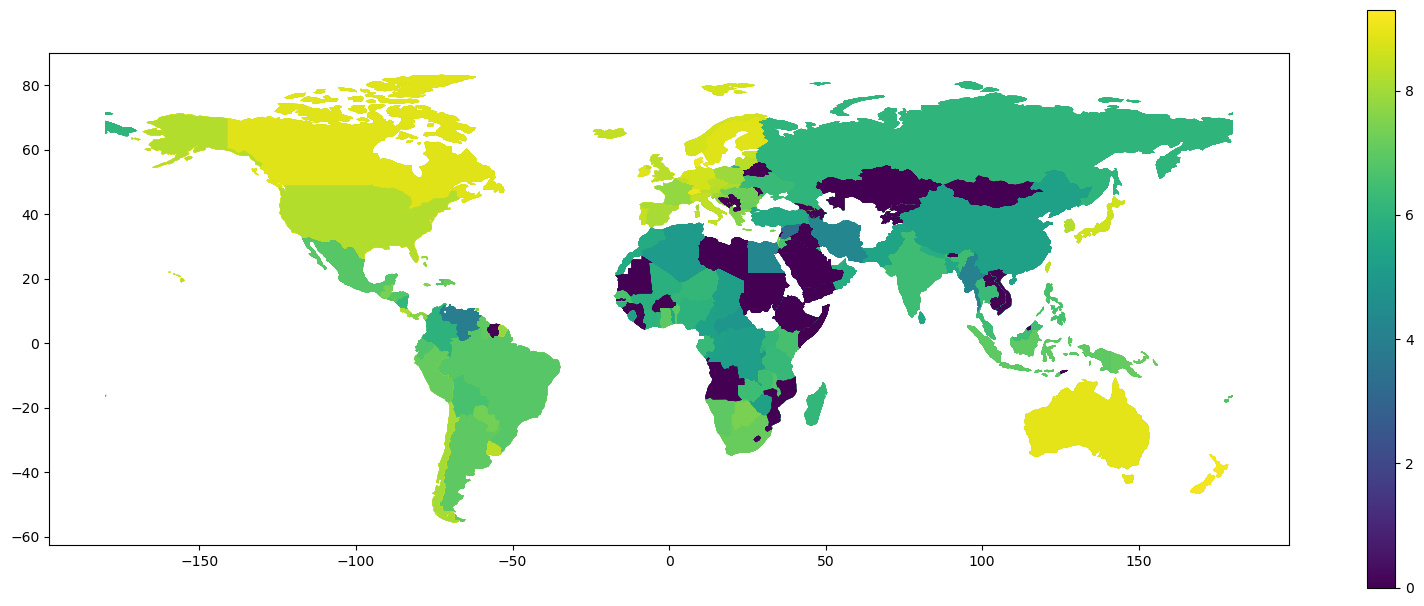

In [346]:
# visualizating using only pandas + geopandas

indicator_chosen = "hf_score"
fig_world = dfw.plot( column= indicator_chosen, \
                                    legend=True, legend_kwds={'shrink': 0.5}, figsize=(20, 15),\
                                    missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

#### Bokeh Using

In [340]:
####  Using Bokeh

import json 

from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer

def get_geodatasource(gdf):    
    """Get getjsondatasource from geopandas object"""
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

def bokeh_plot_map(gdf, column=None, title=''):
    """Plot bokeh map from GeoJSONDataSource """

    geosource = get_geodatasource(gdf)
    palette = brewer['OrRd'][8]
    palette = palette[::-1]
    vals = gdf[column]
    
    #Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
    color_mapper = LinearColorMapper(palette = palette, low = vals.min(), high = vals.max())
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20,
                         location=(0,0), orientation='horizontal')

    TOOLS = 'wheel_zoom,pan,reset'
    p = figure(title = title, plot_height=400 , plot_width=850, toolbar_location='right', tools=TOOLS)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    #Add patch renderer to figure
    p.patches('xs','ys', source=geosource, fill_alpha=1, line_width=0.5, line_color='black',  
              fill_color={'field' :column , 'transform': color_mapper})
    #Specify figure layout.
    p.add_layout(color_bar, 'below')
    return p

In [352]:
dfw.query("year==2020")

pop_est    continent_x                      name iso_a3  gdp_md_est  \
1        889953.0        Oceania                      Fiji    FJI        5496   
41     58005463.0         Africa                  Tanzania    TZA       63177   
60     37589262.0  North America                    Canada    CAN     1736425   
83    328239523.0  North America  United States of America    USA    21433226   
91     18513930.0           Asia                Kazakhstan    KAZ      181665   
...           ...            ...                       ...    ...         ...   
3174    3301000.0         Europe          Bosnia and Herz.    BIH       20164   
3192    2083459.0         Europe           North Macedonia    MKD       12547   
3225    6944975.0         Europe                    Serbia    SRB       51475   
3248     622137.0         Europe                Montenegro    MNE        5542   
3260    1394973.0  North America       Trinidad and Tobago    TTO       24269   

                                               geometry  \
1     MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
41    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
60    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
83    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
91    POLYGON ((87.35997 49.21498, 86.59878 48.54918...   
...                                                 ...   
3174  POLYGON ((18.56000 42.65000, 17.67492 43.02856...   
3192  POLYGON ((22.38053 42.32026, 22.88137 41.99930...   
3225  POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
3248  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
3260  POLYGON ((-61.68000 10.76000, -61.10500 10.890...   

                  name_short ISO2 ISO3 continent_y  ...  \
1                       Fiji   FJ  FJI     Oceania  ...   
41                  Tanzania   TZ  TZA      Africa  ...   
60                    Canada   CA  CAN     America  ...   
83             United States   US  USA     America  ...   
91                Kazakhstan   KZ  KAZ        Asia  ...   
...                      ...  ...  ...         ...  ...   
3174  Bosnia and Herzegovina   BA  BIH      Europe  ...   
3192         North Macedonia   MK  MKD      Europe  ...   
3225                  Serbia   RS  SRB      Europe  ...   
3248              Montenegro   ME  MNE      Europe  ...   
3260     Trinidad and Tobago   TT  TTO     America  ...   

     ef_regulation_business_adm ef_regulation_business_burden  \
1                      4.577247                      6.444444   
41                     4.614886                      1.333333   
60                     4.831349                      7.555556   
83                     5.773777                      6.888889   
91                     4.936823                      6.000000   
...                         ...                           ...   
3174                   1.835982                      4.888889   
3192                   3.307879                      8.000000   
3225                   3.485560                      6.000000   
3248                   5.000000                      7.111111   
3260                   3.462774                      6.444444   

     ef_regulation_business_start ef_regulation_business_impartial  \
1                        8.567024                           5.0775   
41                       8.629031                           6.1000   
60                       9.948824                           8.5500   
83                       9.855026                           8.0775   
91                       9.837816                           4.4600   
...                           ...                              ...   
3174                     7.261326                           2.6175   
3192                     9.487188                           4.6650   
3225                     9.751724                           4.5875   
3248                     9.603196                           4.9550   
3260                     9.656473                           6.6625  

In [353]:
output_notebook()
fig = bokeh_plot_map(dfw.query("year==2020"), column=indicator_chosen)
show(fig)

Loading BokehJS ...

In [354]:
####  Using Bokeh with HoverTool
from bokeh.models import ColumnDataSource, HoverTool, DataTable, TableColumn, StringFormatter, NumberFormatter 

output_notebook()

fig = bokeh_plot_map(dfw.query("year==2020"), column=indicator_chosen)
fig.add_tools(hover)
show(fig)

Loading BokehJS ...

In [356]:
filename_output.replace(".htm","_with_worldmap.htm")

'HRI_human-freedom-index-2022_with_worldmap.htm'

#### Putting altogether

In [357]:
layout = column(Div(text = title_header), slider, plot_Bokeh, fig)

output_notebook()
output_file ( filename = filename_output.replace(".htm","_with_worldmap.htm"), title = title_output,\
              mode = 'inline')

show (layout)

Loading BokehJS ...